In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\VIBHANSHU JAIN\Desktop\Client Project\campus-placement-analysis\EDA_Notebooks\ML_models\tensorflow_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = r'C:\Users\VIBHANSHU JAIN\Desktop\Client Project\campus-placement-analysis\EDA_Notebooks\datasets\cleaned_placement_dataset.csv'
data = pd.read_csv(file_path)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split



# Features (X) and Targets (y)
X = data[['cgpa', 'inter_gpa', 'ssc_gpa', 'internships', 'no_of_projects', 
          'is_participate_hackathon', 'is_participated_extracurricular',
          'no_of_programming_languages', 'dsa', 'mobile_dev', 'web_dev',
          'Machine Learning', 'cloud', 'tier_1', 'tier_2', 'tier_3',
          'gender_F', 'gender_M', 'gender_nan', 'branch_CSE', 'branch_ECE',
          'branch_EEE', 'branch_MECH']]

y = data[['is_placed', 'salary_as_fresher']]  # Two target columns

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor

# For combined prediction of both targets
model = MultiOutputRegressor(
    xgb.XGBRegressor(
        objective='reg:squarederror',
        max_depth=6,
        learning_rate=0.1,
        n_estimators=100
    )
)

# Train
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None, ...))

PLACEMENT EVALUATION (CLASSIFICATION)
Accuracy: 0.8621
Precision: 0.8636
Recall: 0.9500
F1 Score: 0.9048
ROC AUC: 0.9667


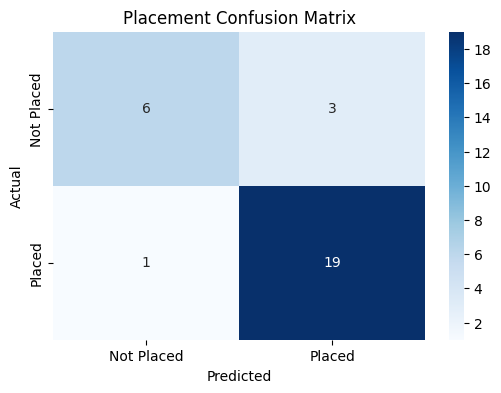


SALARY EVALUATION (REGRESSION)
RMSE: 5.61
MAE: 3.43
R² Score: 0.6561


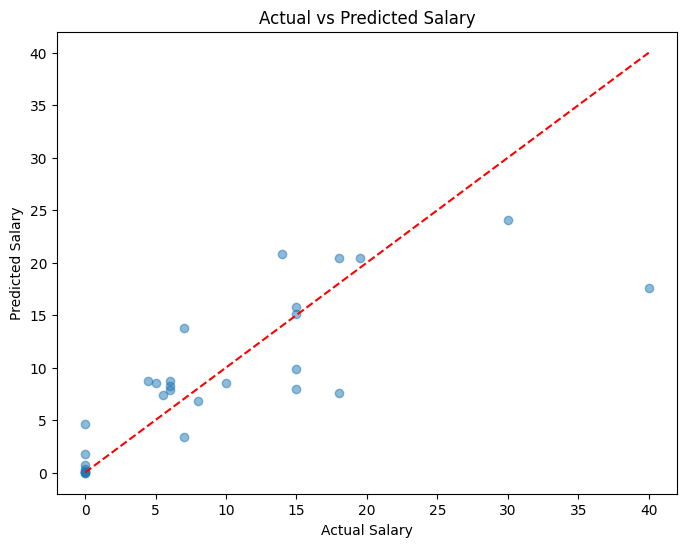

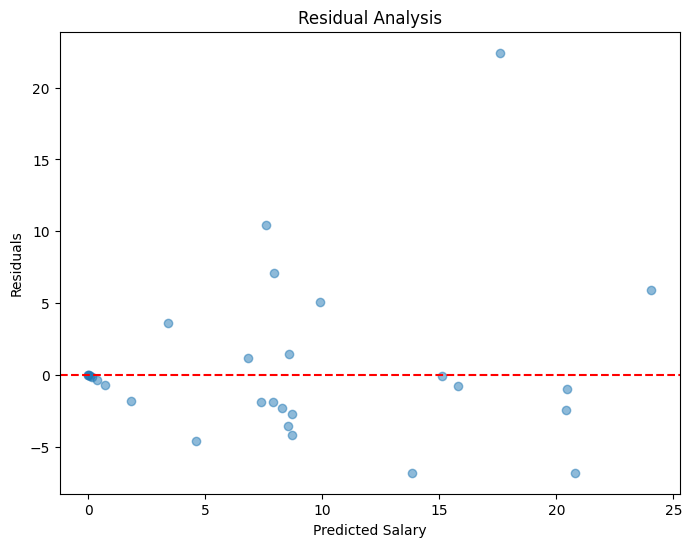

In [5]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            roc_auc_score, confusion_matrix, mean_squared_error, 
                            r2_score, mean_absolute_error)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predictions
y_pred = model.predict(X_test)
is_placed_pred = (y_pred[:, 0] > 0.5).astype(int)  # Binary classification
salary_pred = y_pred[:, 1]  # Regression

# 1. Placement Evaluation (Classification)
print("="*50)
print("PLACEMENT EVALUATION (CLASSIFICATION)")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test['is_placed'], is_placed_pred):.4f}")
print(f"Precision: {precision_score(y_test['is_placed'], is_placed_pred):.4f}")
print(f"Recall: {recall_score(y_test['is_placed'], is_placed_pred):.4f}")
print(f"F1 Score: {f1_score(y_test['is_placed'], is_placed_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test['is_placed'], y_pred[:, 0]):.4f}")  # Using probabilities

# Confusion Matrix
cm = confusion_matrix(y_test['is_placed'], is_placed_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Placed', 'Placed'], 
            yticklabels=['Not Placed', 'Placed'])
plt.title('Placement Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 2. Salary Evaluation (Regression)
print("\n" + "="*50)
print("SALARY EVALUATION (REGRESSION)")
print("="*50)
# Calculate RMSE correctly
rmse = np.sqrt(mean_squared_error(y_test['salary_as_fresher'], salary_pred))
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mean_absolute_error(y_test['salary_as_fresher'], salary_pred):.2f}")
print(f"R² Score: {r2_score(y_test['salary_as_fresher'], salary_pred):.4f}")

# Actual vs Predicted Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test['salary_as_fresher'], salary_pred, alpha=0.5)
plt.plot([y_test['salary_as_fresher'].min(), y_test['salary_as_fresher'].max()],
         [y_test['salary_as_fresher'].min(), y_test['salary_as_fresher'].max()], 
         'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

# Residual Plot
residuals = y_test['salary_as_fresher'] - salary_pred
plt.figure(figsize=(8,6))
plt.scatter(salary_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

In [6]:
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

# Predict both targets
y_pred = model.predict(X_test)
is_placed_pred = (y_pred[:, 0] > 0.5).astype(int)  # Convert probability to binary
salary_pred = y_pred[:, 1]  # Continuous salary values

# Evaluation
print("Placement Accuracy:", accuracy_score(y_test['is_placed'], is_placed_pred))

# Correct RMSE calculation - two equivalent options:
# Option 1: Using numpy's sqrt with MSE
print("Salary RMSE:", np.sqrt(mean_squared_error(y_test['salary_as_fresher'], salary_pred)))

# Option 2: Using scikit-learn's MSE only (if you just want MSE)
# print("Salary MSE:", mean_squared_error(y_test['salary_as_fresher'], salary_pred))

Placement Accuracy: 0.8620689655172413
Salary RMSE: 5.613593332461688


In [8]:
from joblib import dump

# Save the entire model
dump(model, 'multi_output_xgboost.joblib')



['multi_output_xgboost.joblib']